In [144]:
country_df

index                                    country
0        0                                Afghanistan
1        1                              Aland Islands
2        2                                    Albania
3        3                                    Algeria
4        4                             American Samoa
5        5                                    Andorra
6        6                                     Angola
7        7                                   Anguilla
8        8                                 Antarctica
9        9                        Antigua and Barbuda
10      10                                  Argentina
11      11                                    Armenia
12      12                                      Aruba
13      13                                  Australia
14      14                                    Austria
15      15                                 Azerbaijan
16      16                                    Bahamas
17      17                                    Bahrain
18      18                                 Bangladesh
19      19                                   Barbados
20      20                                    Belarus
21      21                                    Belgium
22      22                                     Belize
23      23                                      Benin
24      24                                    Bermuda
25      25                                     Bhutan
26      26                                    Bolivia
27      27                                    Bonaire
28      28                     Bosnia and Herzegovina
29      29                                   Botswana
..     ...                                        ...
220    220                                   Tanzania
221    221                                   Thailand
222    222                                Timor-Leste
223    223                                       Togo
224    224                                    Tokelau
225    225                                      Tonga
226    226                        Trinidad and Tobago
227    227                                    Tunisia
228    228                                     Turkey
229    229                               Turkmenistan
230    230                   Turks and Caicos Islands
231    231                                     Tuvalu
232    232                        U.S. Virgin Islands
233    233                                     Uganda
234    234                                    Ukraine
235    235                       United Arab Emirates
236    236                             United Kingdom
237    237                              United States
238    238       United States Minor Outlying Islands
239    239                                    Uruguay
240    240                                 Uzbekistan
241    241                                    Vanuatu
242    242                                  Venezuela
243    243                                    Vietnam
244    244                          Wallis and Futuna
245    245                             Western Sahara
246    246                                      Yemen
247    247                                     Zambia
248    248                                   Zimbabwe
249    249  the former Yugoslav Republic of Macedonia

[250 rows x 2 columns]

In [7]:
print('How many edges are given from a source to target more than once over time: ',
      len(np.where(data[['source', 'target']].duplicated())[0]))

How many edges are given from a source to target more than once over time:  8045522


# Data basic analysis

In [8]:
data_len = len(data)
print('Data has {} #edges.\nIt spans from {} to {}.\n'
      'It has {} #nodes (unique) in total duration.'.format(
          data_len,
          min(data['edge_date']),
          max(data['edge_date']),
          len(set(data['source']).union(set(data['target'])))))

pos = len(np.where(data['weight'] > 0)[0])
neg = len(np.where(data['weight'] < 0)[0])
zer = len(np.where(data['weight'] == 0)[0])  # It should not be any zeros.
print('\nEdge (trust/distrust) over time:\n\t+:'
      ' {}({}%)\n\t-: {}({}%)\n\t0: {}({}%).'.format(
          pos, round(100*pos/data_len),
          neg, round(100*neg/data_len),
          zer, round(100*zer/data_len)))

Data has 8073921 #edges.
It spans from 1995-01-01 to 2018-09-30.
It has 250 #nodes (unique) in total duration.

Edge (trust/distrust) over time:
	+: 5974283(74%)
	-: 1333646(17%)
	0: 765992(9%).


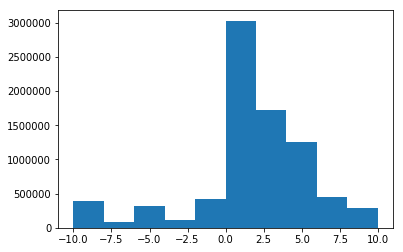

In [9]:
plt.hist(data['weight']);

# Plotting

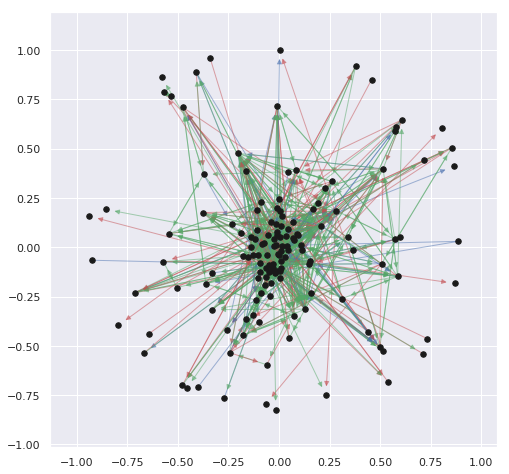

In [149]:
sns.set(rc={'figure.figsize':(8, 8)})
G = separate_dgraphs[0]

colors = []
for edge in G.edges():
    weight = G.get_edge_data(edge[0], edge[1])['weight']
    if weight == 0:
        colors.append('b')
    elif weight > 0:
        colors.append('g')
    else:
        colors.append('r')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=30,
                       node_color='k',
                       cmap=plt.cm.Greys)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=colors)
plt.show()

In [153]:
G = Network(directed=True, notebook=True)
G.from_nx(separate_dgraphs[0])
G.show_buttons(filter_=['physics'])
G.show("mygraph.html")

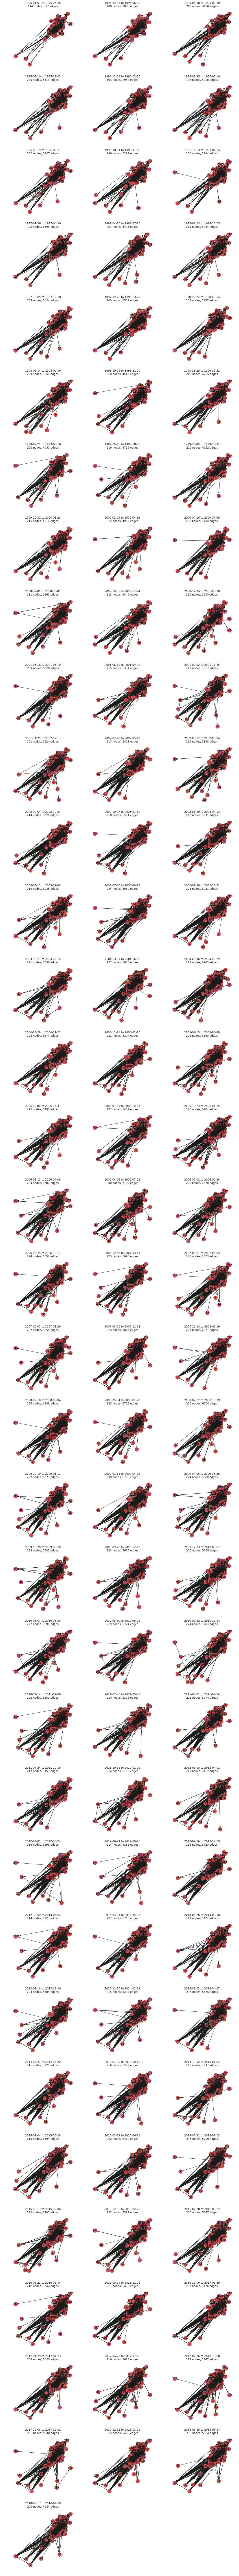

In [142]:
# Just to create title names.
title_names = []
start_date = min(data['edge_date'])
end_date = max(data['edge_date'])
periods_num = int(np.floor((end_date - start_date).days / (weeks * 7)))
for period_index in range(periods_num):
    period_start = (
        start_date + period_index * datetime.timedelta(weeks * 7))
    period_end = period_start + datetime.timedelta(weeks * 7)
    title_names.append('{} to {}'.format(period_start, period_end))

network_utils.plot_evolving_graphs(dgraphs=separate_dgraphs, titles=title_names)

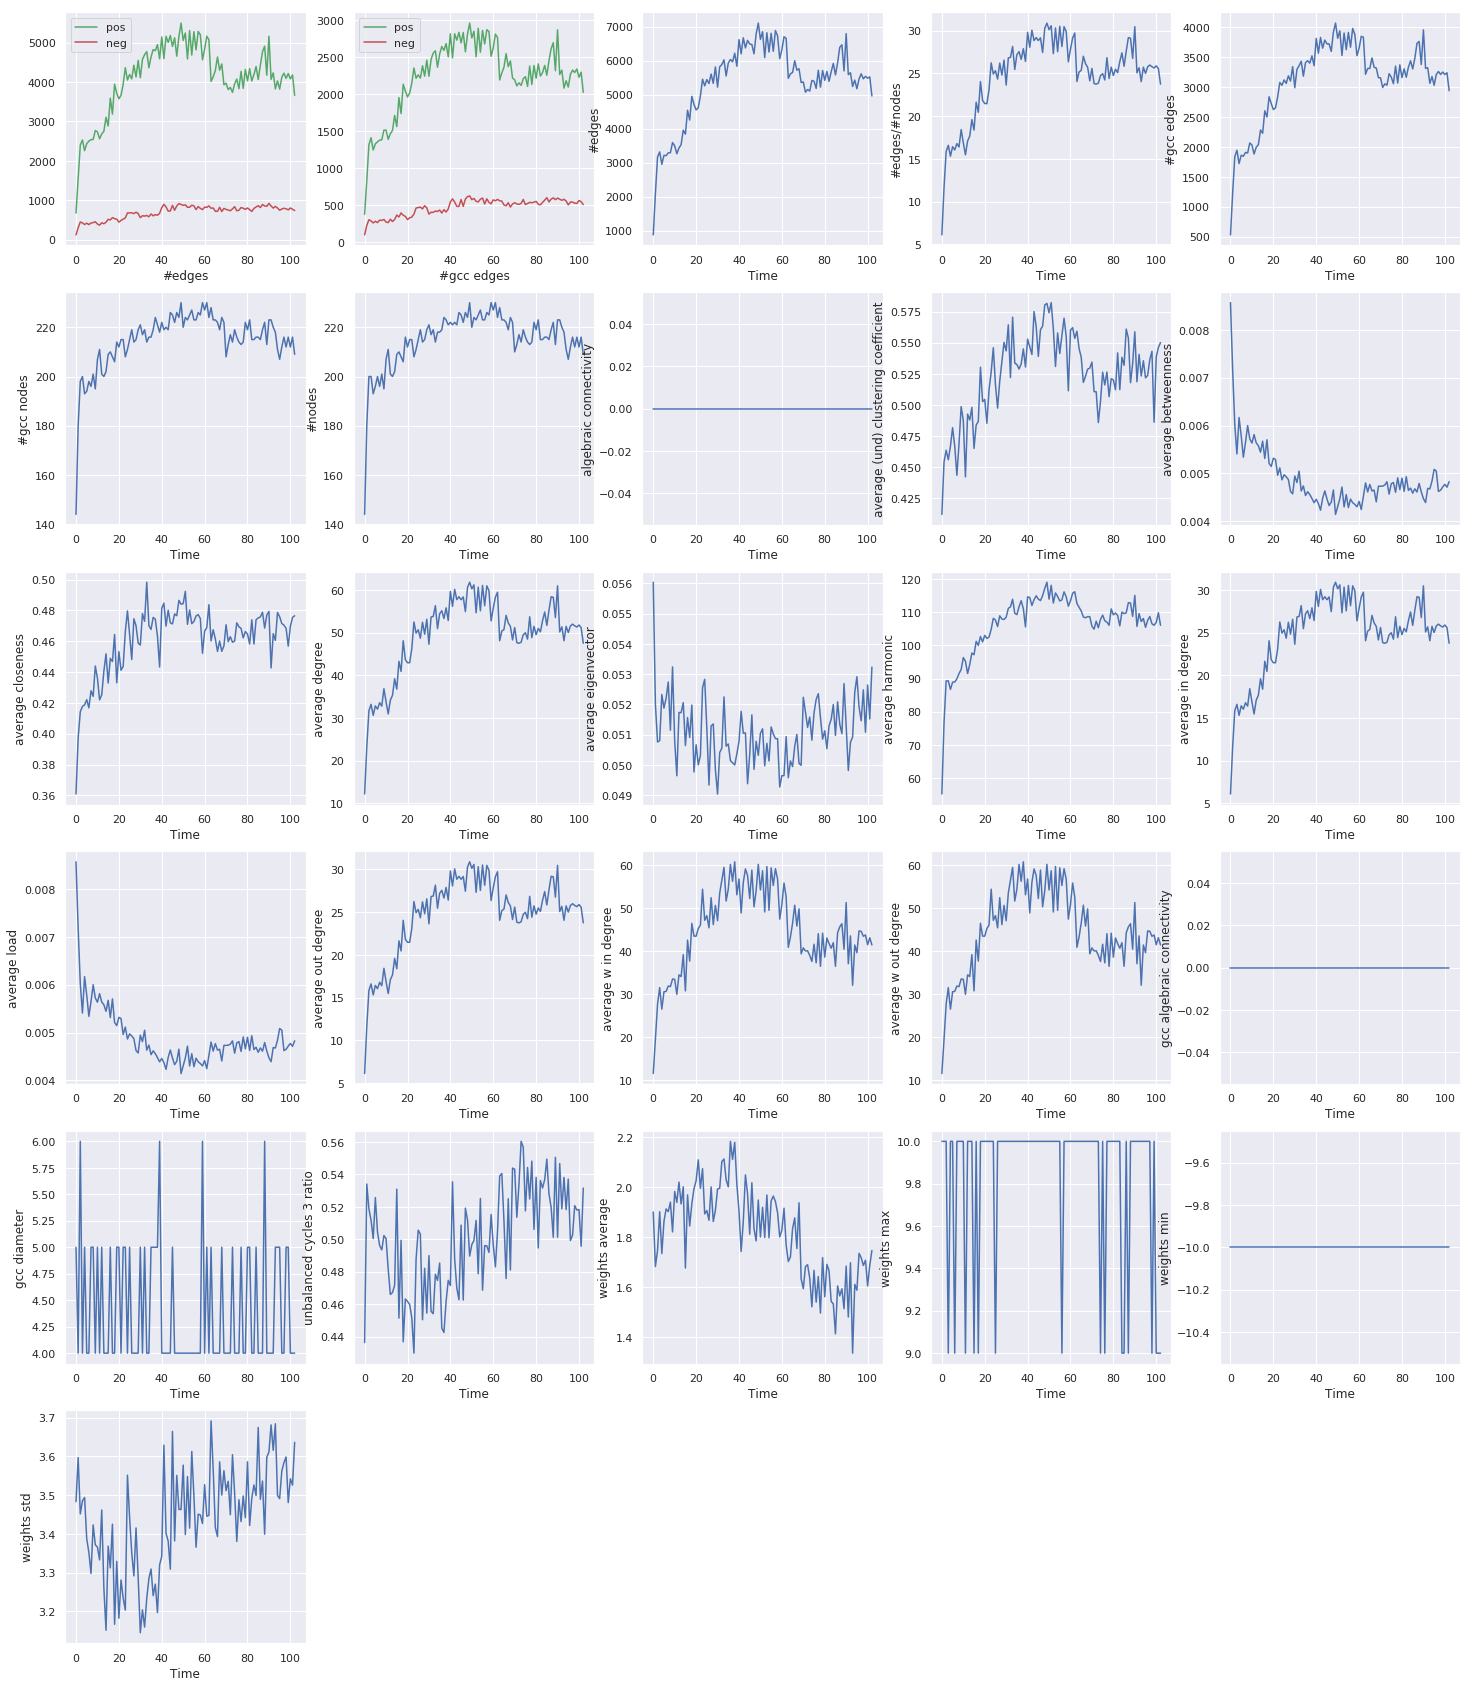

In [144]:
m = 6
n = 5
sns.set(rc={'figure.figsize':(25, 30)})

sorted_keys = sorted(list(
    set(evolving_metrics.keys()) - set([
        '#pos edges', '#neg edges', '#gcc pos edges', '#gcc neg edges'])))

plt.subplot(m, n, 1)
plt.plot(evolving_metrics['#pos edges'], 'g')
plt.plot(evolving_metrics['#neg edges'], 'r')
plt.xlabel('#edges')
plt.legend(['pos', 'neg'])

plt.subplot(m, n, 2)
plt.plot(evolving_metrics['#gcc pos edges'], 'g')
plt.plot(evolving_metrics['#gcc neg edges'], 'r')
plt.xlabel('#gcc edges')
plt.legend(['pos', 'neg'])

for index, key in enumerate(sorted_keys):
    plt.subplot(m, n, index+3)
    plt.plot(evolving_metrics[key])
    plt.ylabel(key)
    plt.xlabel('Time')

# How transition matrices change over time

In [16]:
periods = network_utils.get_just_periods(edge_list=data, weeks=weeks, accumulative=False)

## L2-nrom distance of each matrix from the average transition matrix.

### Separated

/cs/student/omid55/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


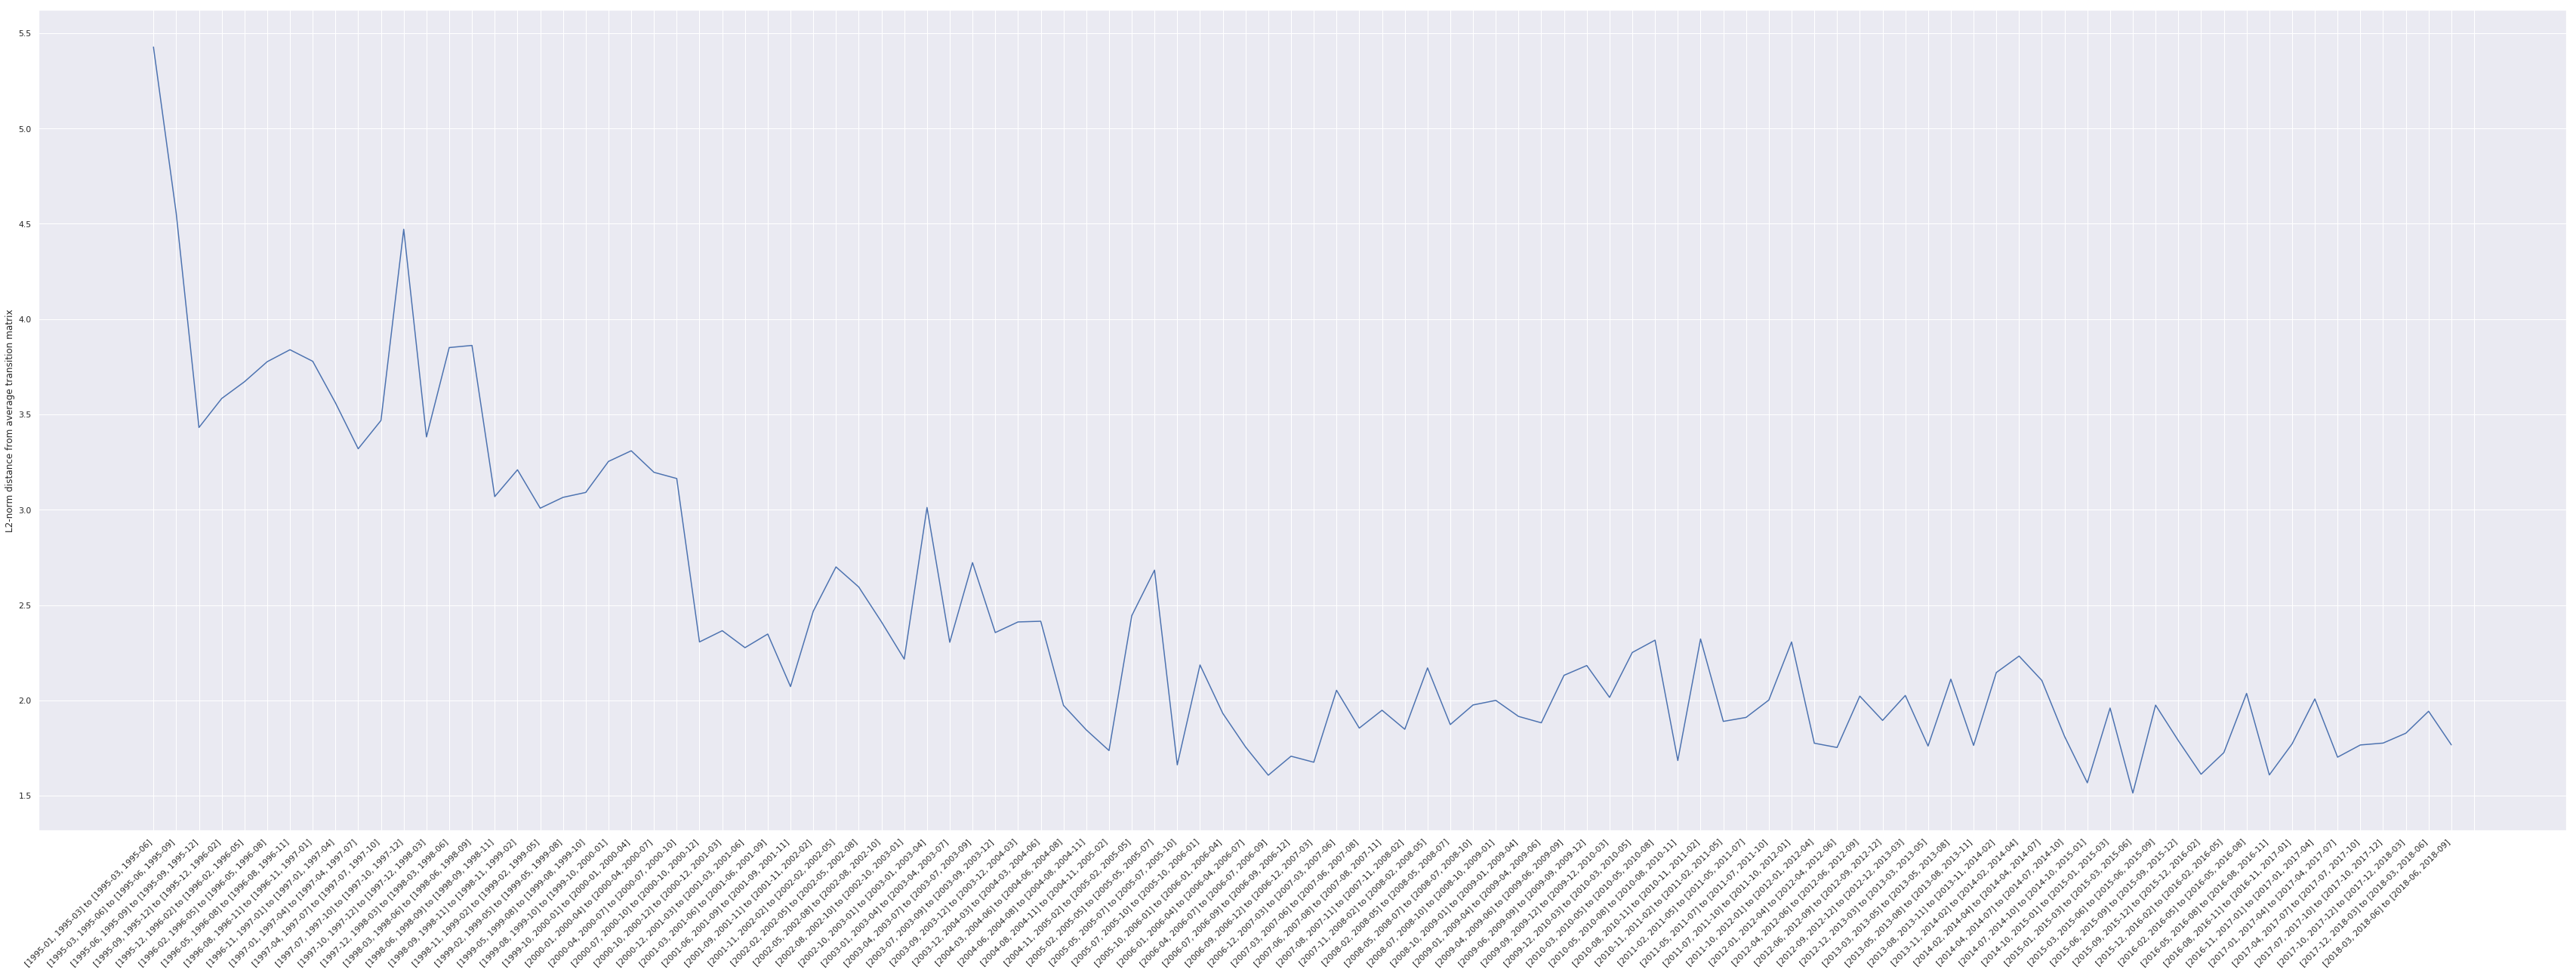

In [144]:
sns.set(rc={'figure.figsize': (60, 20)})
l2norm_dists = []
for matrix in result['transition_matrices']:
    l2norm_dists.append(np.linalg.norm(matrix - mean_transition_matrix))
plt.plot(l2norm_dists)
plt.ylabel('L2-norm distance from average transition matrix.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}] to [{}, {}]'.format(periods[i][0][:7], periods[i][1][:7], periods[i+1][0][:7], periods[i+1][1][:7]) for i in range(number_of_periods-1)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

### Accumulative

/cs/student/omid55/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


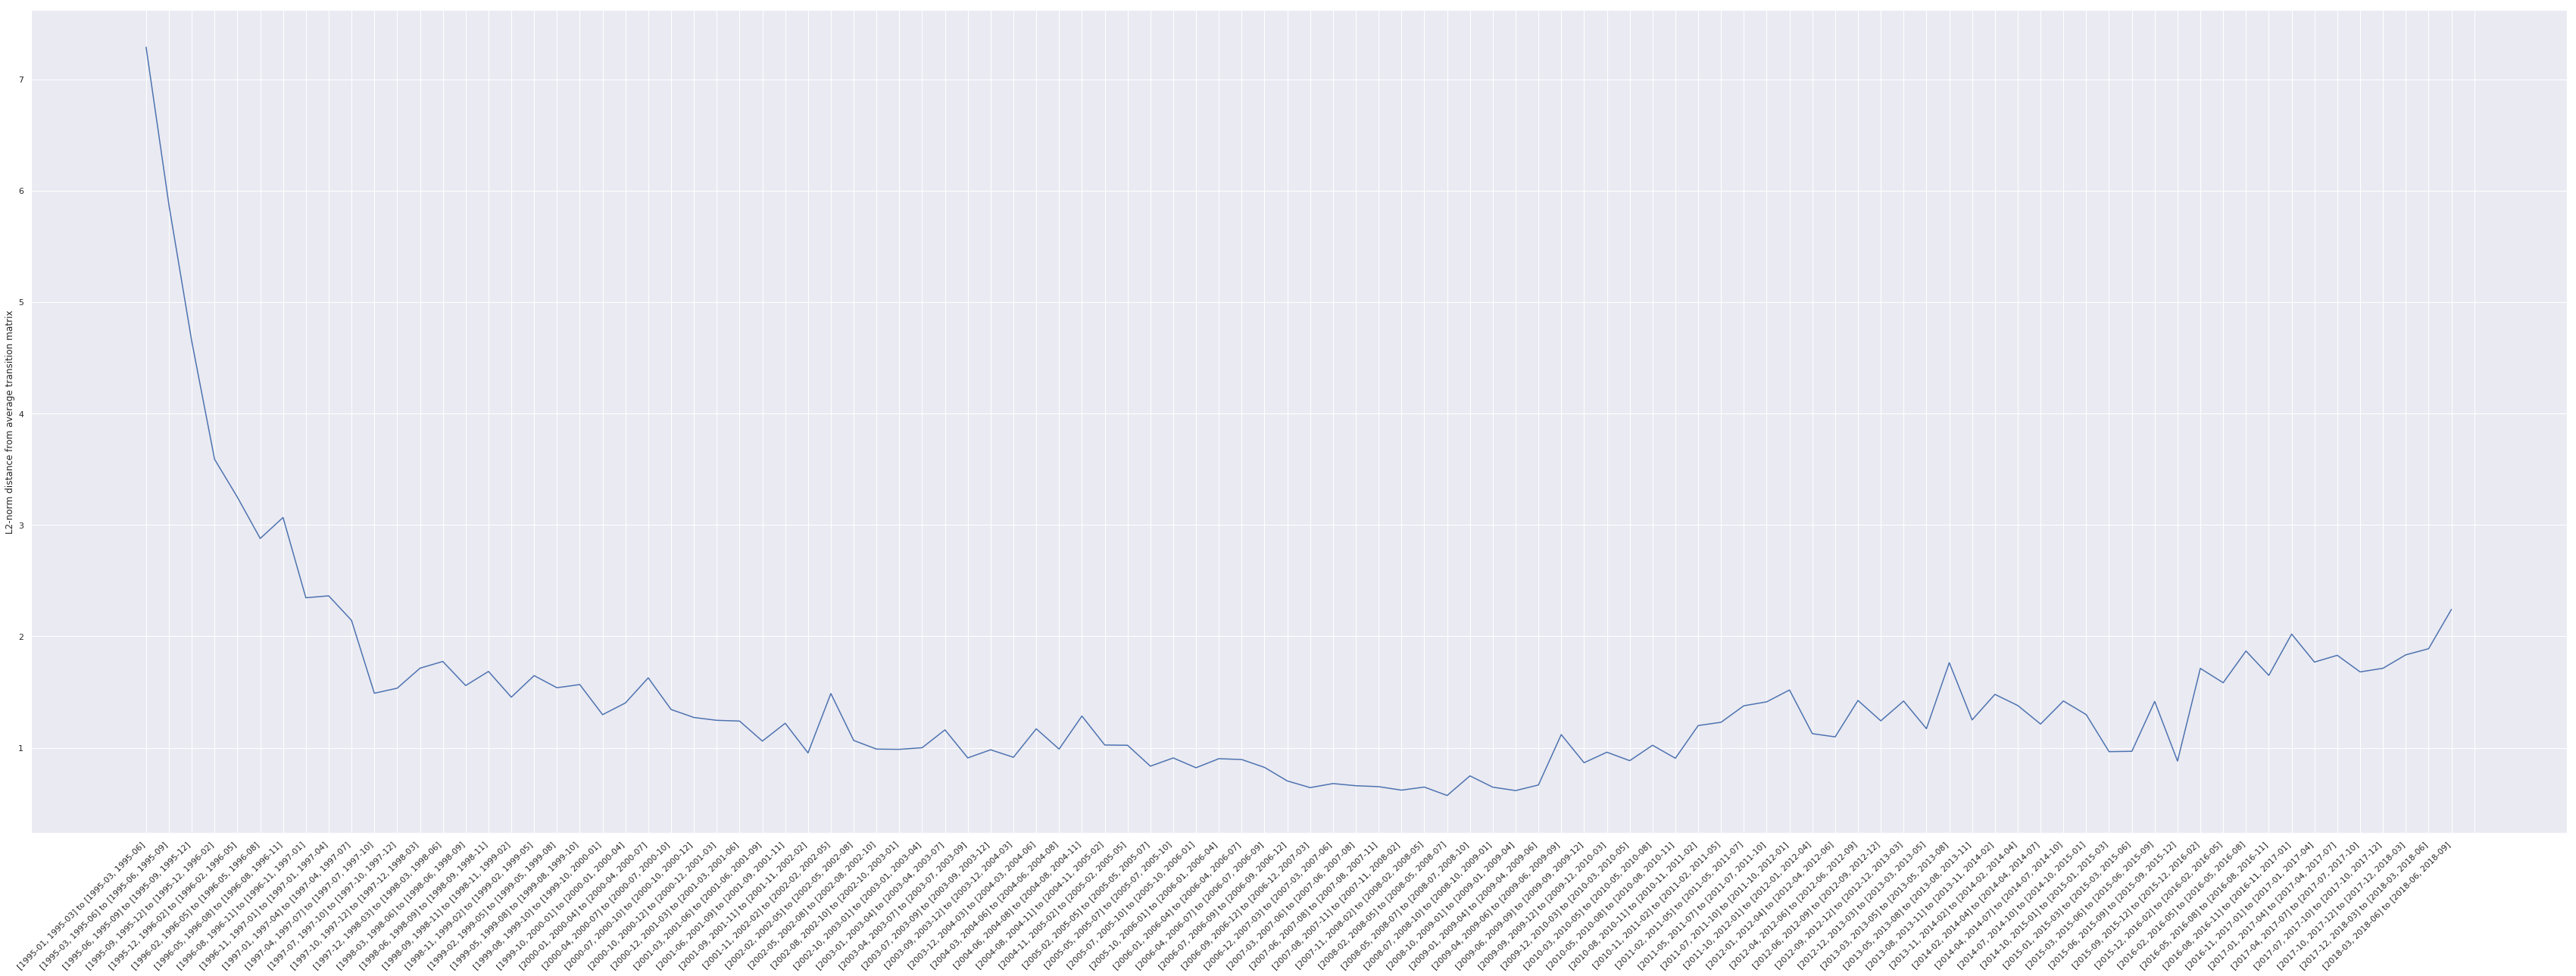

In [145]:
sns.set(rc={'figure.figsize': (60, 20)})
acc_l2norm_dists = []
for matrix in acc_result['transition_matrices']:
    acc_l2norm_dists.append(np.linalg.norm(matrix - acc_mean_transition_matrix))
plt.plot(acc_l2norm_dists)
plt.ylabel('L2-norm distance from average transition matrix.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}] to [{}, {}]'.format(periods[i][0][:7], periods[i][1][:7], periods[i+1][0][:7], periods[i+1][1][:7]) for i in range(number_of_periods-1)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

## L2-nrom distance of each matrix from its previous one.

### Separated

/cs/student/omid55/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


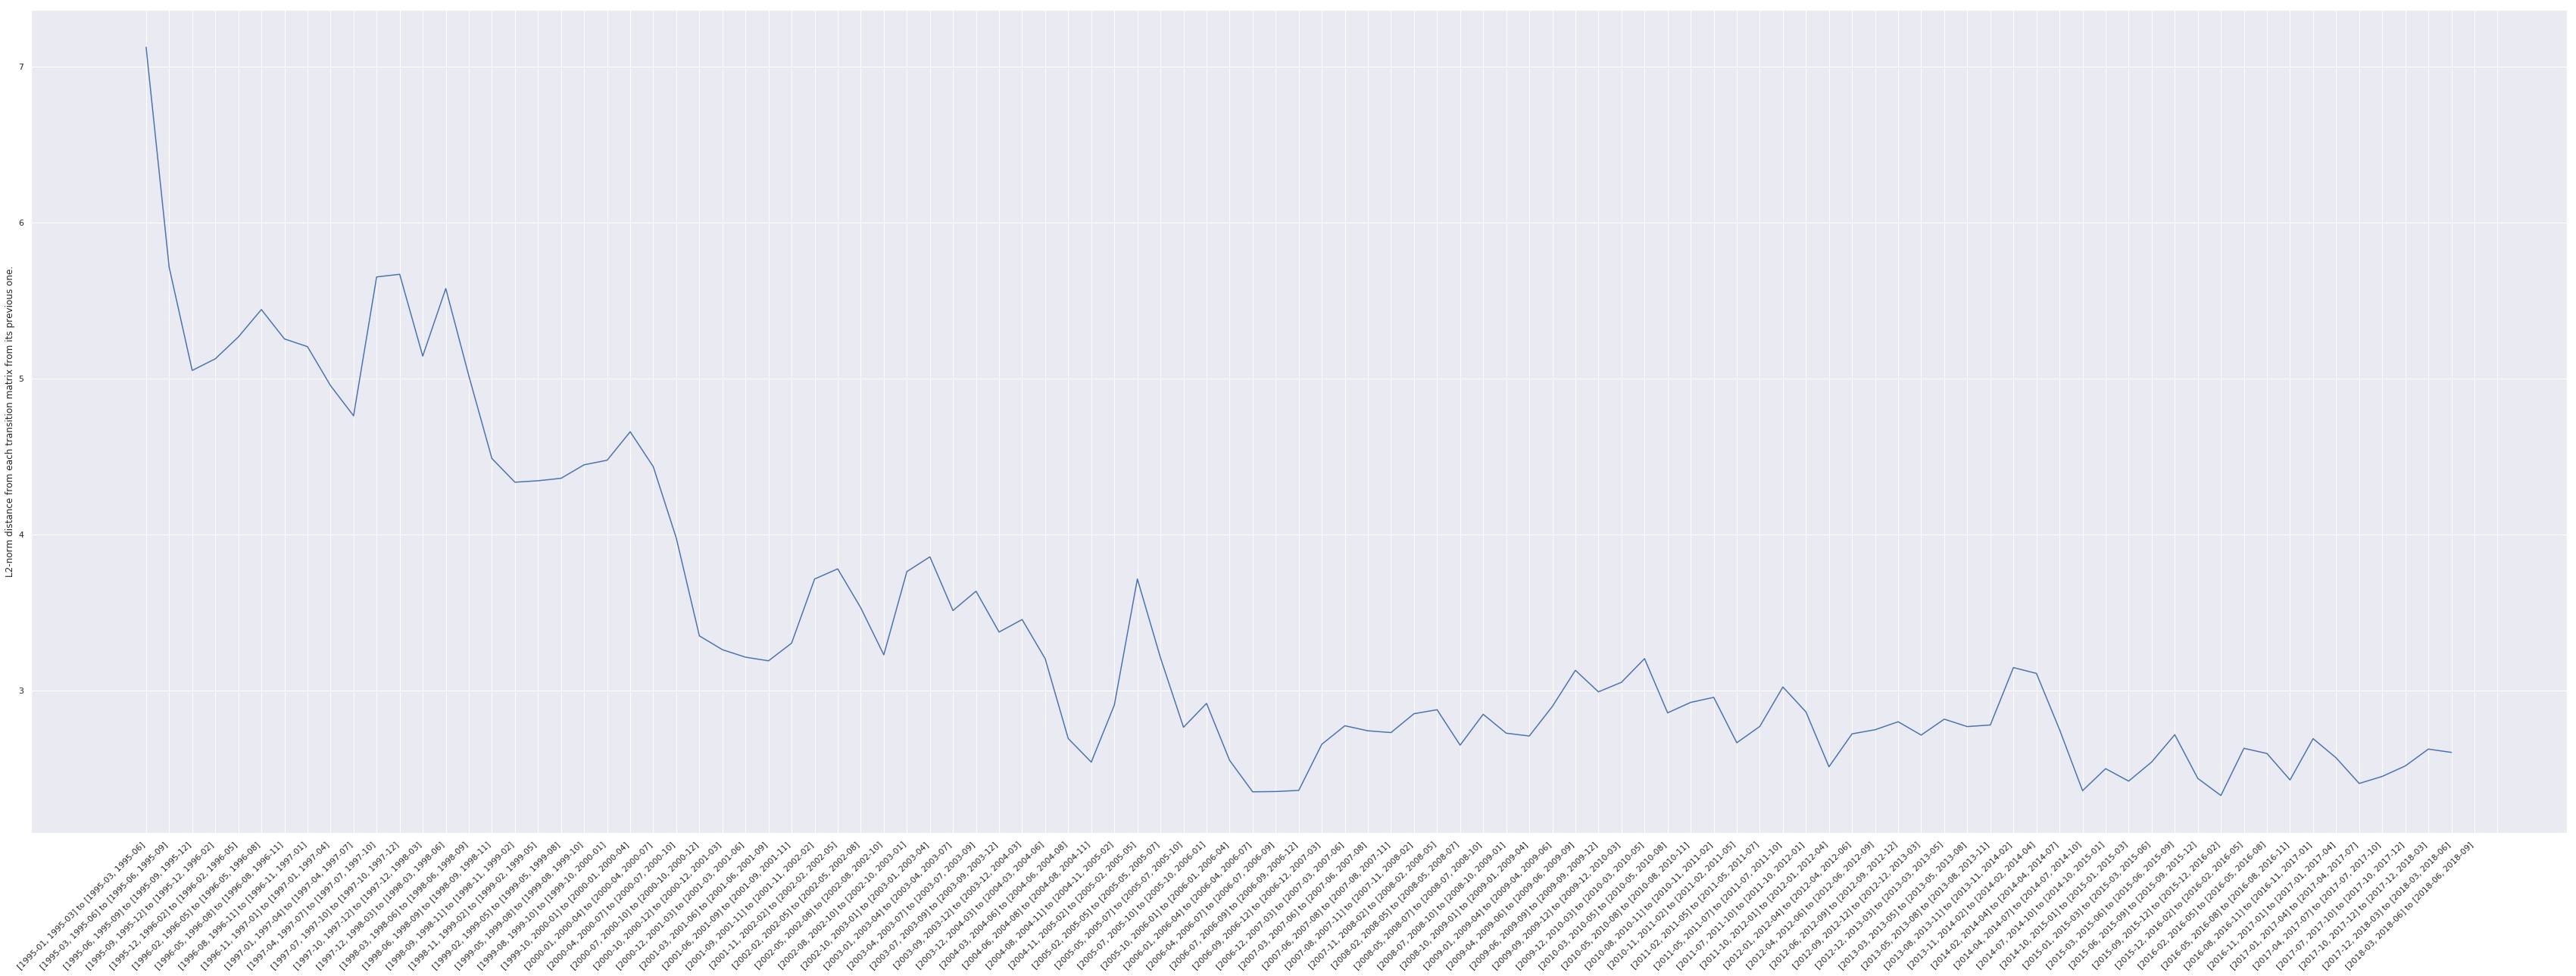

In [148]:
sns.set(rc={'figure.figsize': (60, 20)})
from_prev_l2norm_dists = []
n = len(result['transition_matrices'])
for i in range(1, n):
    current = result['transition_matrices'][i]
    prev = result['transition_matrices'][i-1]
    from_prev_l2norm_dists.append(np.linalg.norm(prev - current))
plt.plot(from_prev_l2norm_dists)
plt.ylabel('L2-norm distance from each transition matrix from its previous one.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}] to [{}, {}]'.format(periods[i][0][:7], periods[i][1][:7], periods[i+1][0][:7], periods[i+1][1][:7]) for i in range(number_of_periods-1)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

### Accumulative

/cs/student/omid55/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


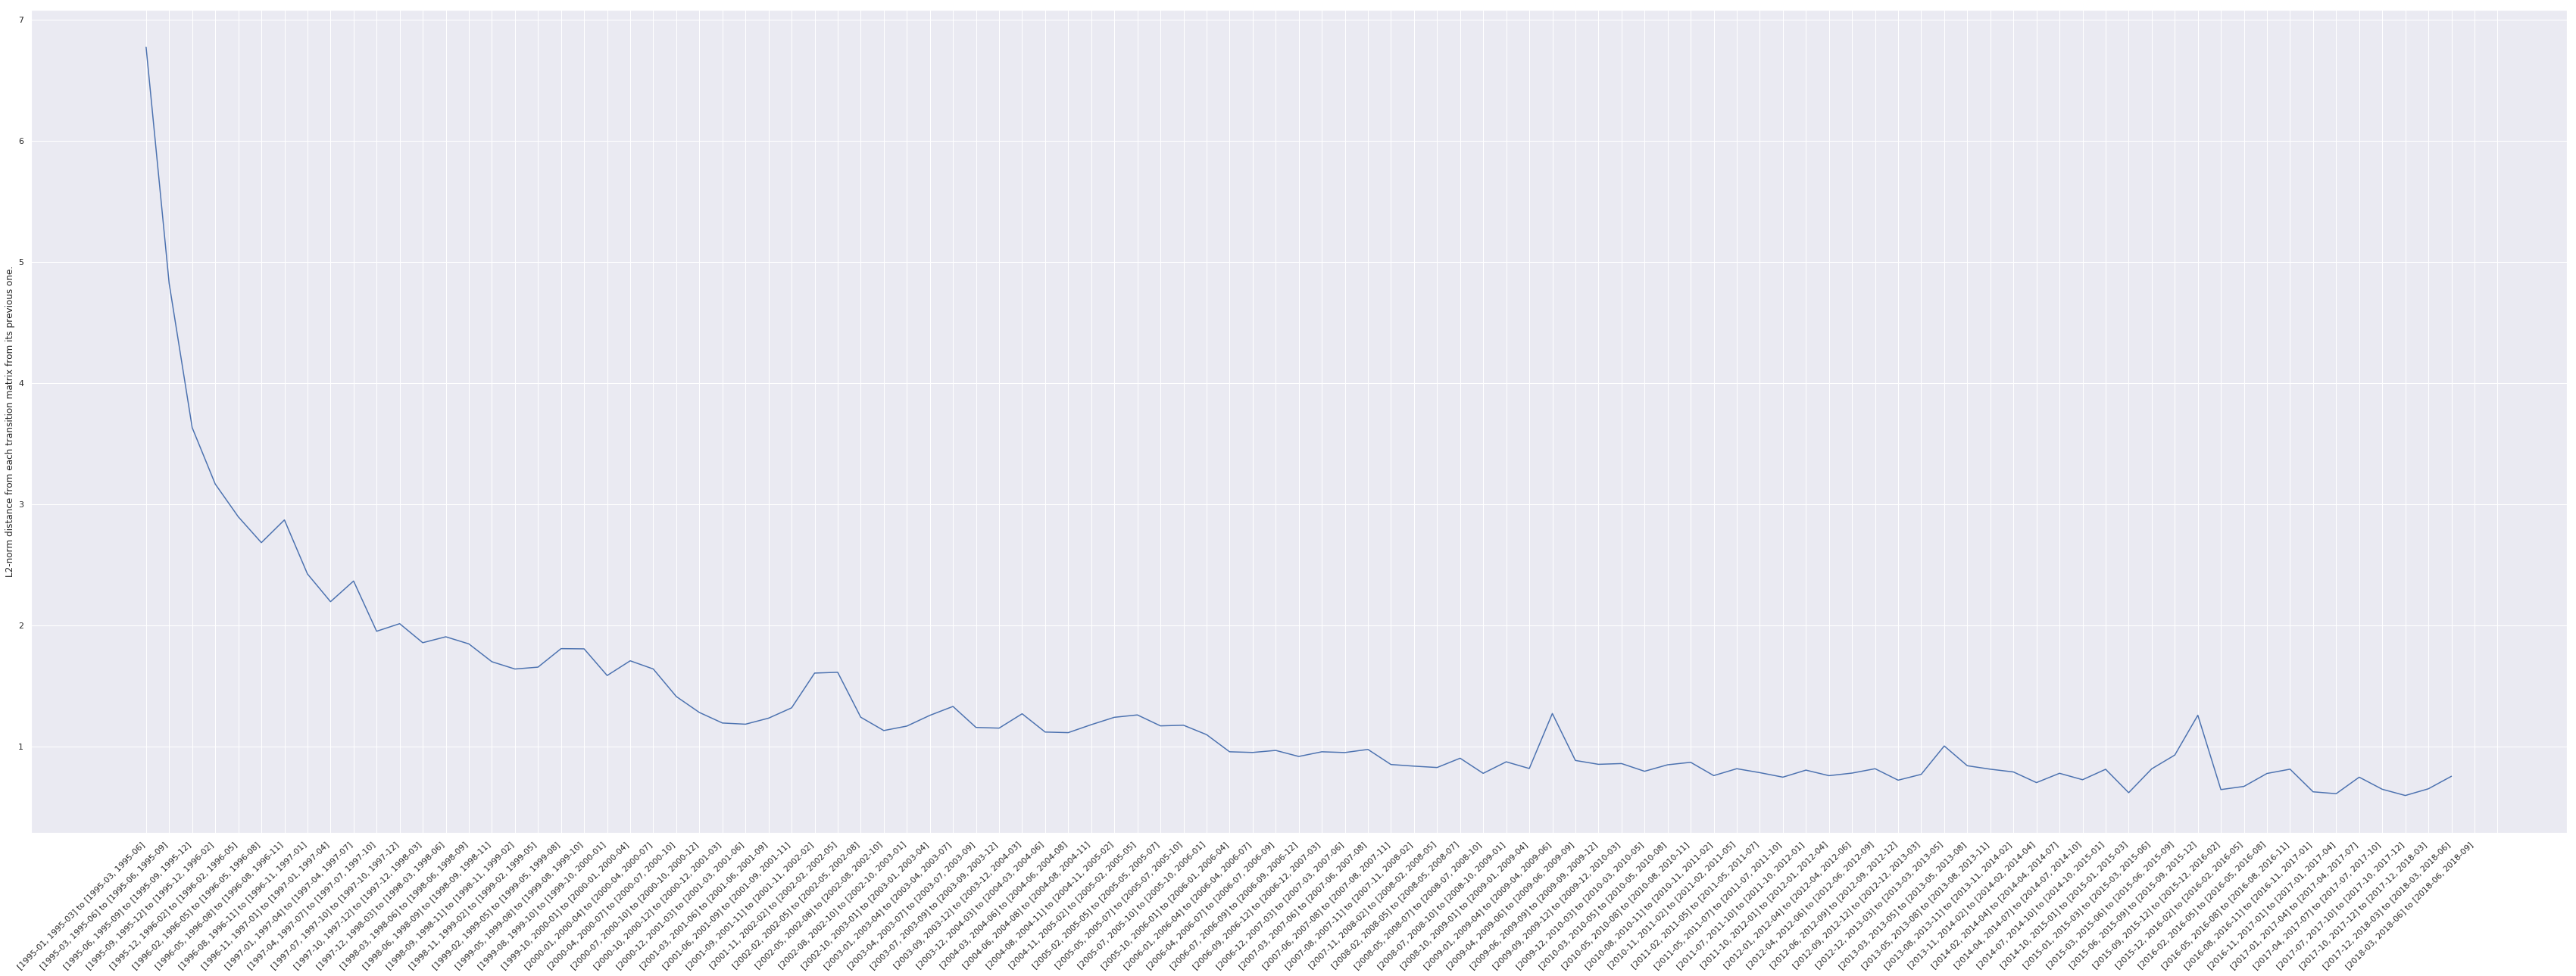

In [149]:
sns.set(rc={'figure.figsize': (60, 20)})
acc_from_prev_l2norm_dists = []
n = len(acc_result['transition_matrices'])
for i in range(1, n):
    current = acc_result['transition_matrices'][i]
    prev = acc_result['transition_matrices'][i-1]
    acc_from_prev_l2norm_dists.append(np.linalg.norm(prev - current))
plt.plot(acc_from_prev_l2norm_dists)
plt.ylabel('L2-norm distance from each transition matrix from its previous one.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}] to [{}, {}]'.format(periods[i][0][:7], periods[i][1][:7], periods[i+1][0][:7], periods[i+1][1][:7]) for i in range(number_of_periods-1)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

# Transitivity balance over time

In [11]:
balanced = 0
transitive_balances = []
for triad in triad_list:
    bal = network_utils.is_sparsely_transitive_balanced(triad)
    transitive_balances.append(bal)
    if bal:
        balanced += 1

In [12]:
print('Transitive balanced triads: ', balanced)
print('Out of triads: ', len(triad_list))

Transitive balanced triads:  93
Out of triads:  138


## Separated 

/cs/student/omid55/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


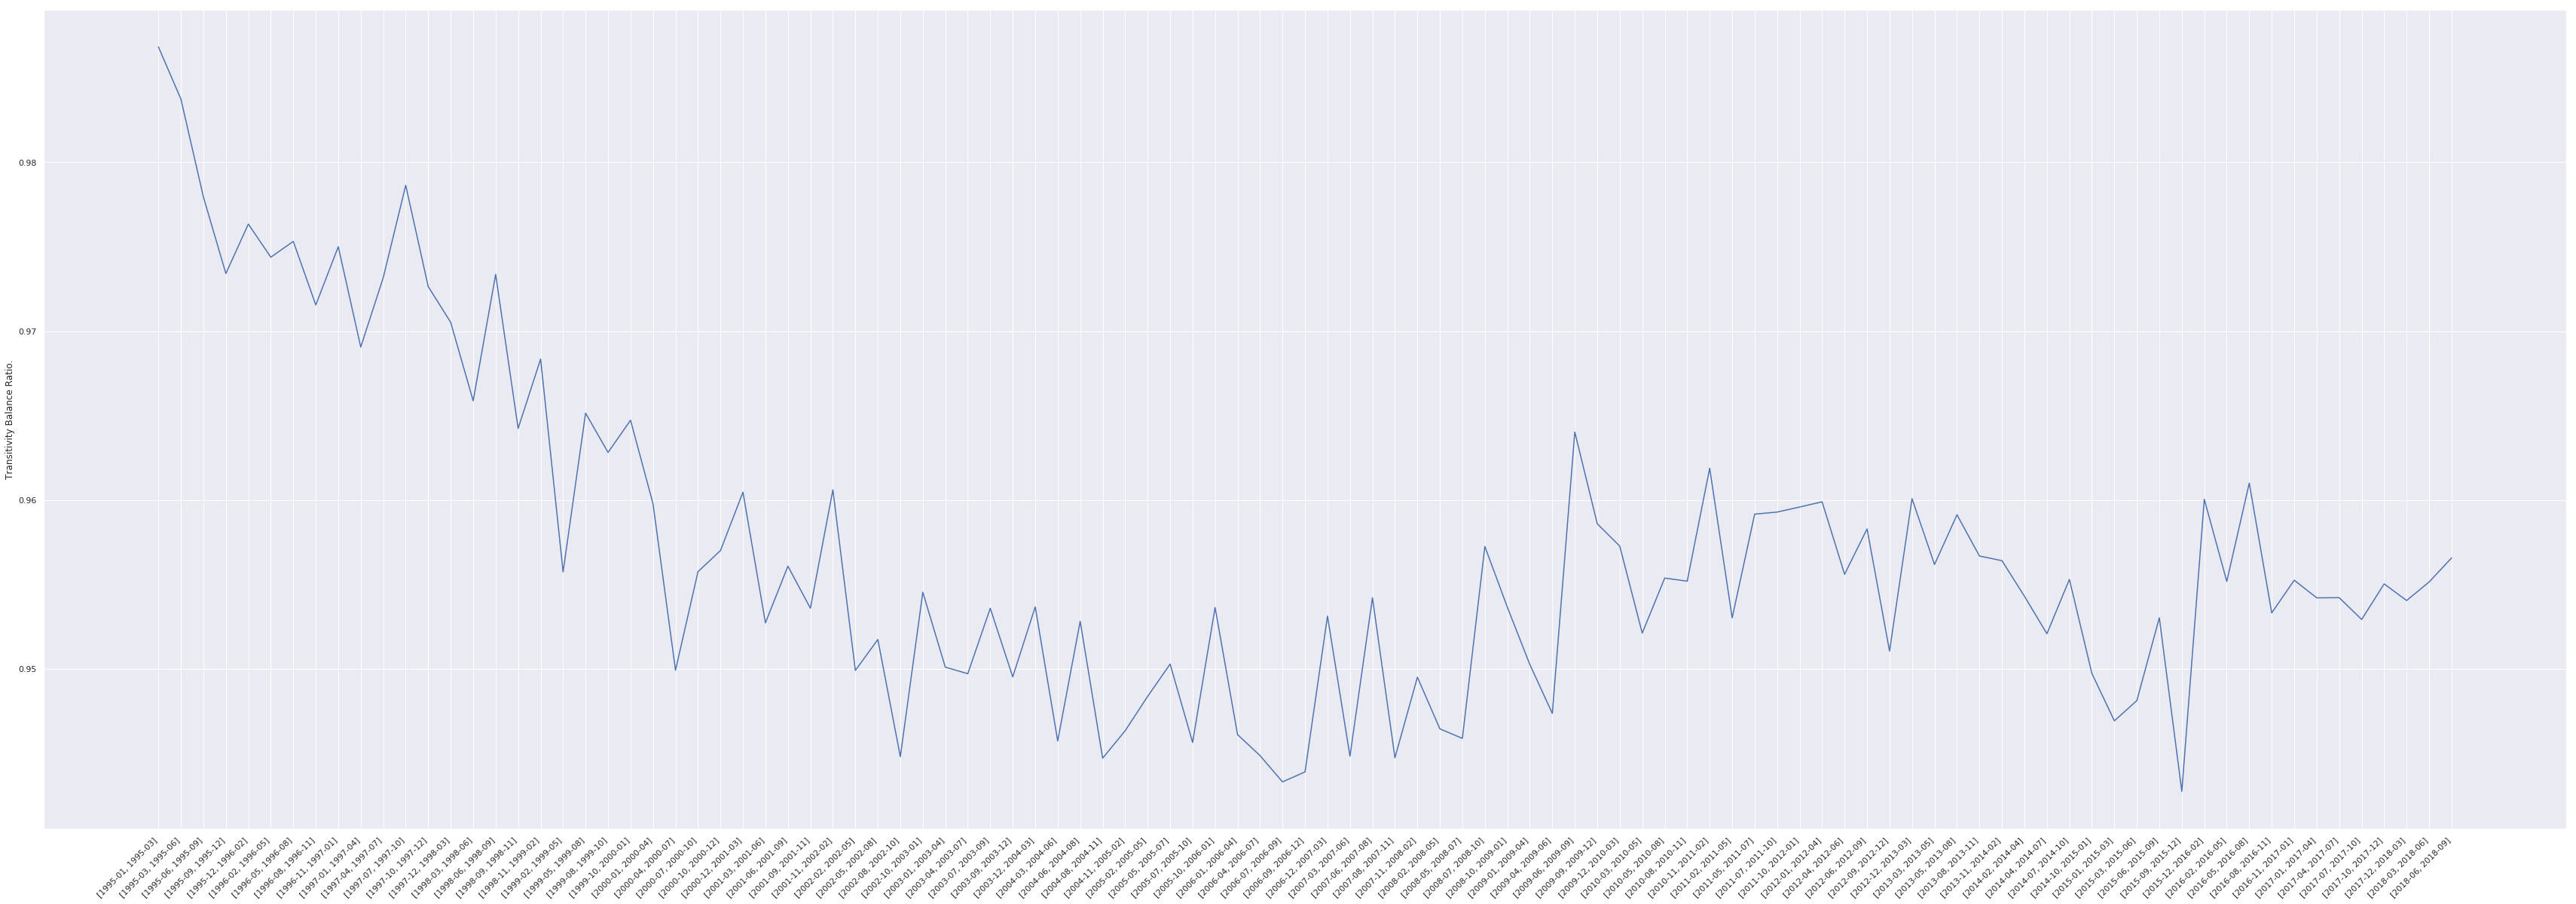

In [18]:
sns.set(rc={'figure.figsize': (60, 20)})
transitivity_balance = []
for period_triads in result['triads_types']:
    balanced = 0.0
    for triad_index in period_triads.values():
        if transitive_balances[triad_index]:
            balanced += 1.0
    balanced /= len(period_triads)
    transitivity_balance.append(balanced)
plt.plot(transitivity_balance)
plt.ylabel('Transitivity Balance Ratio.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}]'.format(periods[i][0][:7], periods[i][1][:7]) for i in range(number_of_periods)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

## Accumulative 

/cs/student/omid55/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


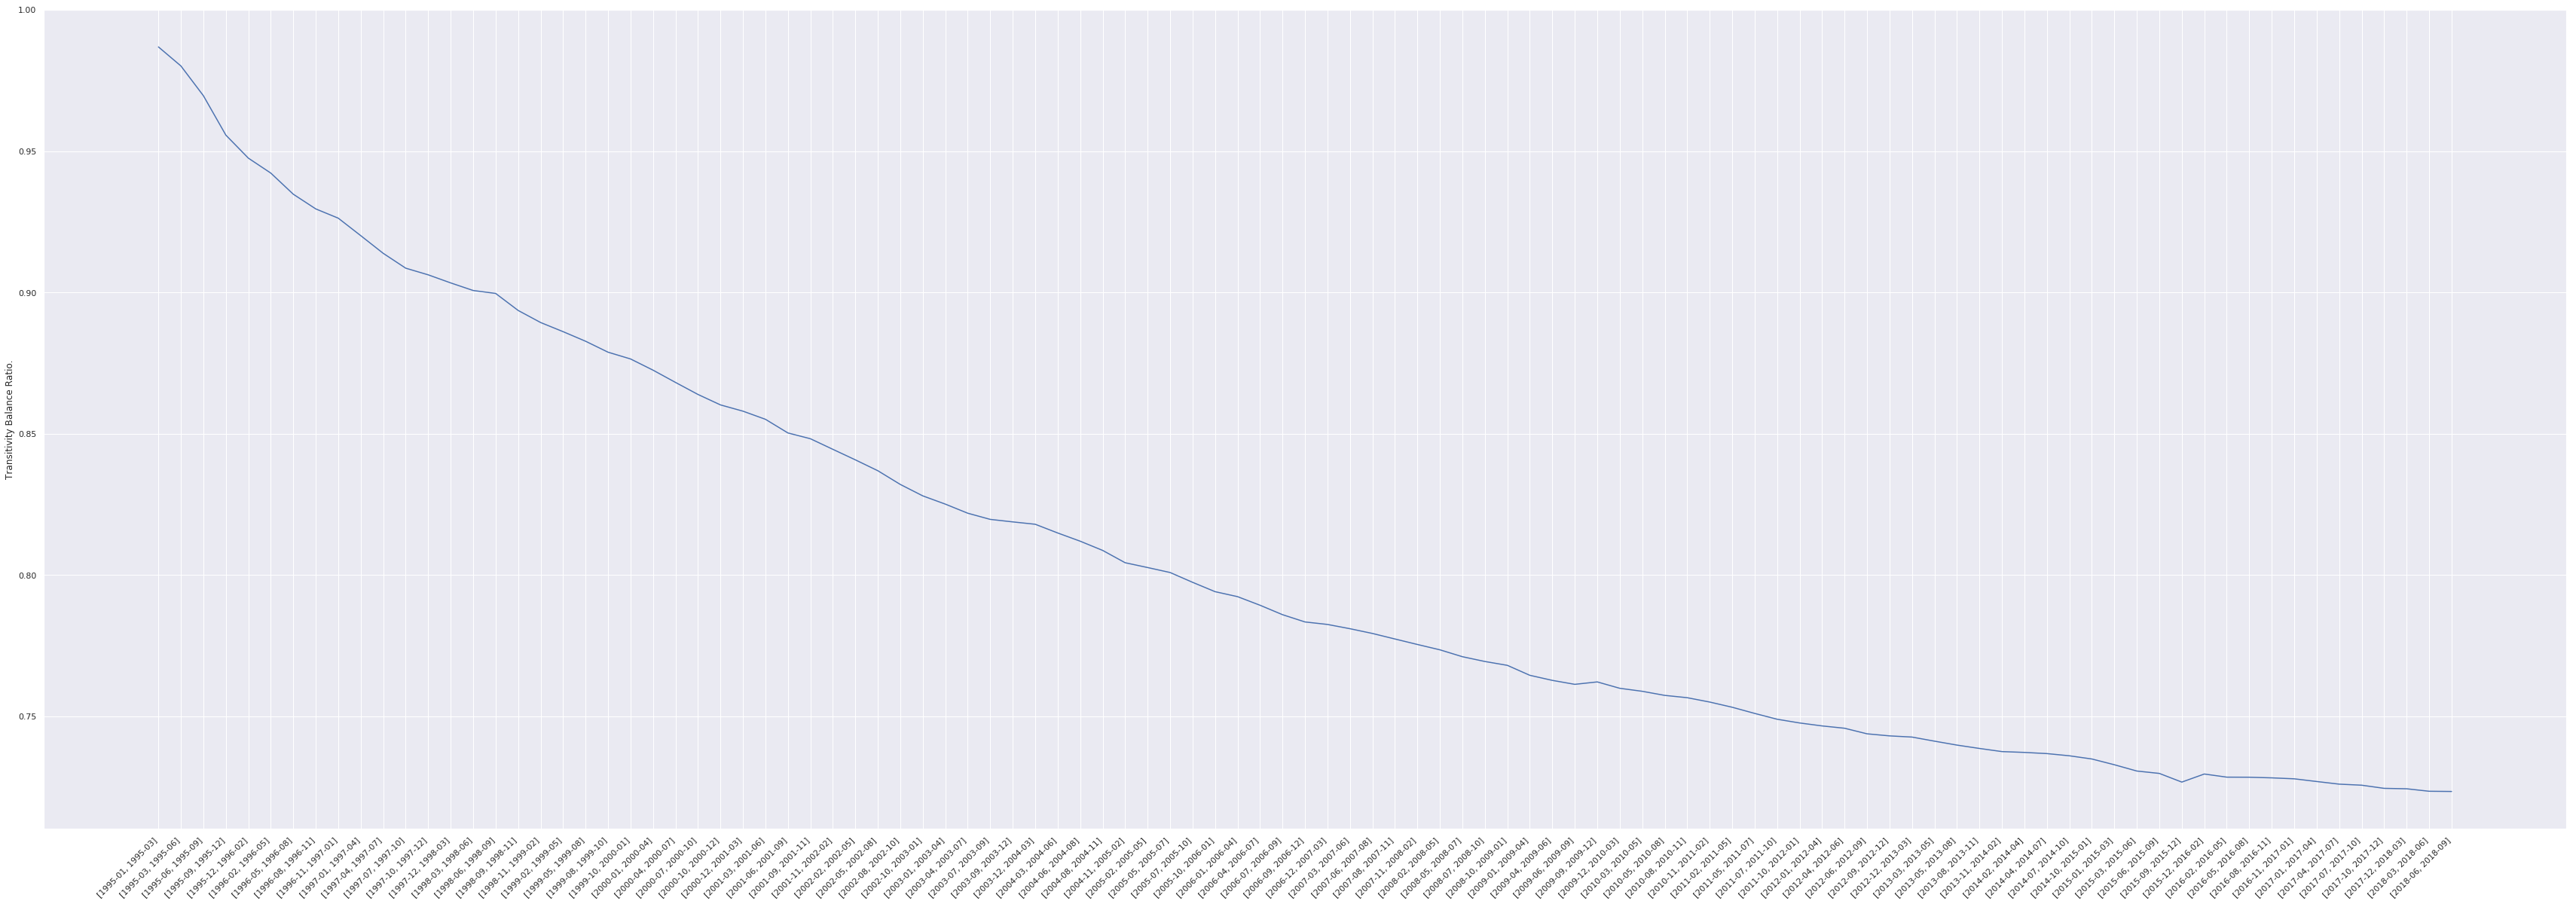

In [19]:
sns.set(rc={'figure.figsize': (60, 20)})
acc_transitivity_balance = []
for period_triads in acc_result['triads_types']:
    balanced = 0.0
    for triad_index in period_triads.values():
        if transitive_balances[triad_index]:
            balanced += 1.0
    balanced /= len(period_triads)
    acc_transitivity_balance.append(balanced)
plt.plot(acc_transitivity_balance)
plt.ylabel('Transitivity Balance Ratio.')
# seting xticks
ax = plt.axes()
number_of_periods = len(periods)
ax.set_xticks(list(range(number_of_periods)))
labels = ['[{}, {}]'.format(periods[i][0][:7], periods[i][1][:7]) for i in range(number_of_periods)]
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")